In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/8t/19klq0xd5w7cf39d3893ts0w0000gn/T/ipykernel_51334/750926817.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute_bin'] = df['S2'].dt.floor('T')  # 'T' is for minute


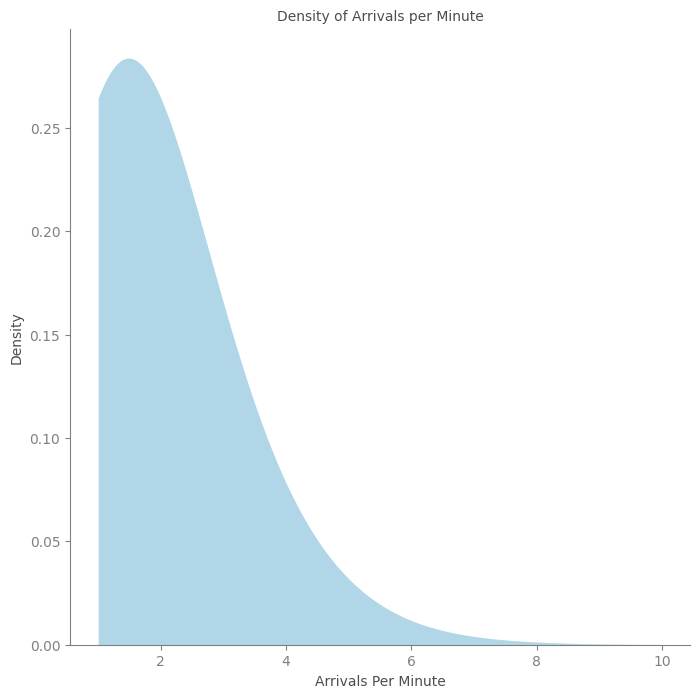

In [10]:
df = pd.read_csv('data-p3/joined_all_clustered.csv')
# Convert 'S2' to datetime, sorting by arrival time
df['S2'] = pd.to_datetime(df['S2'], errors='coerce')
df = df.sort_values(by='S2')
# Create a new column for the minute of each arrival
# This helps us bin the arrivals into 1-minute intervals
df['minute_bin'] = df['S2'].dt.floor('T')  # 'T' is for minute
# Count the number of arrivals per minute for the entire dataset
arrivals_per_minute = df.groupby('minute_bin').size()
plt.figure(figsize=(8, 8))
sns.kdeplot(arrivals_per_minute, fill=True, color='#63AFD3', bw_method=1, cut=0,alpha=0.5,linewidth=0)


ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='both', which='both', colors='gray')

ax.set_xlabel('Arrivals Per Minute', color='#4d4d4d')
ax.set_ylabel('Density', color='#4d4d4d')
ax.set_title('Density of Arrivals per Minute', color='#4d4d4d', fontsize=10)

plt.savefig(f'website_figures/arrivals_per_minute.png', format='png', bbox_inches='tight', transparent=False, dpi=600)